# The Fibonacci Sequence

The Fibonacci sequence is a sequence of numbers that is defined by the following recurrence relation:

$$f_{n+2} = f_{n+1} + f_n$$

where $f_0 = 0$ and $f_1 = 1$.  

The first few terms of the sequence are:

$$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, ...$$

The Fibonacci sequence is interesting for a number of reasons.  For example, the ratio of successive terms in the sequence approaches a constant value as n becomes large.  This constant value is known as the golden ratio, and is given by:

$$\phi = \frac{1 + \sqrt{5}}{2}$$

The golden ratio is an irrational number, and has a value of approximately 1.618.  The golden ratio has been studied for thousands of years, and has been found to have many interesting properties.  For example, the golden ratio appears in nature in a number of places, such as in the spiral patterns of sunflowers and pinecones, and in the arrangement of leaves on a stem.  The golden ratio also appears in the design of the Parthenon in Greece, and in the Mona Lisa painting by Leonardo da Vinci.

In this notebook, we will explore the Fibonacci sequence, and will also look at the complex Fibonacci sequence.



In [1]:
def fibonacci_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n-1)+fibonacci_recursive(n-2)
    
for i in range(20):
    print(f"%d, " % fibonacci_recursive(i), end="")
print()


0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 


### Problems

As is easily seen from the above code, the Fibonacci sequence grows very quickly.  In fact, the number of operations required to calculate the $n^{th}$ term of the sequence grows exponentially with n.  This is a problem, because it means that we can only calculate a few terms of the sequence before the calculation becomes too time-consuming.

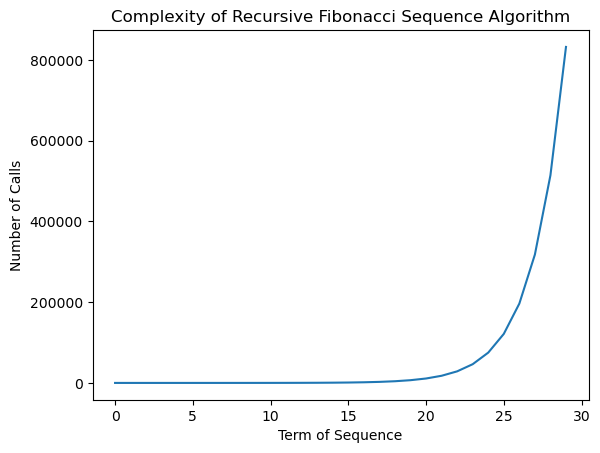

In [5]:
import matplotlib.pyplot as plt

x_values = []
y_values = []

def calls(n):
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return calls(n-1) + calls(n-2)

for i in range(30):
    x_values.append(i)
    y_values.append(calls(i))

plt.plot(x_values,y_values)
plt.title("Complexity of Recursive Fibonacci Sequence Algorithm")
plt.xlabel("Term of Sequence")
plt.ylabel("Number of Calls")
#plt.yscale("log")
plt.show()

Another issue is that the maximum number that can be represented using 64-bit integers is $2^{64} - 1 = 18,446,744,073,709,551,615$.  This means that we can only calculate the first 93 terms of the Fibonacci sequence before we run into problems with integer overflow!!!

How do we get around these problems? 

Let's start by looking at a different algorithm for calculating the Fibonacci sequence. One way to to take an iterative approach, and simply calculate the next term in the sequence based on the previous two terms.

Let's see how this works in practice.  We'll start by defining a function, fibonacci_iterative(n), which calculates the $n^{th}$ term of the Fibonacci sequence using the above algorithm. 

In [6]:
def fibonacci_iterative(n):  # Scaling = O(n)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        t1 = 0
        t2 = 1
        for i in range(2, n+1):
            t3 = t2 + t1
            t1 = t2
            t2 = t3
        return t3

In [7]:
for i in range(70):
    print(f"%d, " % fibonacci_iterative(i), end="")

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 

### Other Approaches

So, we have a much better algorithm now, but we still face the issue of integer overflow.  How do we get around this?

One approach is to use the decimal module in Python, which allows us to use arbitrary precision arithmetic.  This means that we can use as many digits as we need to represent the numbers in the Fibonacci sequence.  The downside of this approach is that it is much slower than using 64-bit integers.

We can also use a really interesting observation about the Fibonacci sequence - there is actually a $formula$ for calculating the $n^{th}$ term of the sequence!  This formula is:

$$f_n = \frac{\phi^n - (-1/\phi)^n}{\sqrt{5}}$$

where $\phi = \frac{1 + \sqrt{5}}{2}$.

We have to be careful though.  Using this formula requires that we use floating point arithmetic, which is not exact.  This means that we will get rounding errors, which will accumulate as we calculate more terms of the sequence.  This means that we will eventually get incorrect results if we use this formula to calculate the Fibonacci sequence.

In [8]:
import decimal as dec

def fibonacci_phi(n):  # Expect O(1)
    global phi
    global one, two, five, onehalf
    return round((phi**n-(-one/phi)**n)/five**onehalf)

dec.getcontext().prec = 150

one = dec.Decimal(1)
two = dec.Decimal(2)
five = dec.Decimal(5)
onehalf = dec.Decimal(0.5)

phi = (one + five ** onehalf) / two

for i in range(70):
    print(f"%d, " % fibonacci_phi(i), end="")

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 

### Efficiency Comparison

Let's compare the efficiency of the three algorithms we've looked at so far.  We'll use the timeit module to measure the execution time of each algorithm.  We'll also use the matplotlib library to plot the execution times as a function of n.

The Iterative    0th term of the Fibonacci sequence is 0
Elapsed time: 0.0001 seconds

The Decimal   0th term of the Fibonacci sequence is 0
Elapsed time: 0.0026 seconds

The Recursive 0th term of the Fibonacci sequence is 0
Elapsed time: 0.0000 seconds
The Iterative    1st term of the Fibonacci sequence is 1
Elapsed time: 0.0000 seconds

The Decimal   1st term of the Fibonacci sequence is 1
Elapsed time: 0.0026 seconds

The Recursive 1st term of the Fibonacci sequence is 1
Elapsed time: 0.0000 seconds
The Iterative    2nd term of the Fibonacci sequence is 1
Elapsed time: 0.0000 seconds

The Decimal   2nd term of the Fibonacci sequence is 1
Elapsed time: 0.0025 seconds

The Recursive 2nd term of the Fibonacci sequence is 1
Elapsed time: 0.0000 seconds
The Iterative    3rd term of the Fibonacci sequence is 2
Elapsed time: 0.0000 seconds

The Decimal   3rd term of the Fibonacci sequence is 2
Elapsed time: 0.0030 seconds

The Recursive 3rd term of the Fibonacci sequence is 2
Elapsed time:

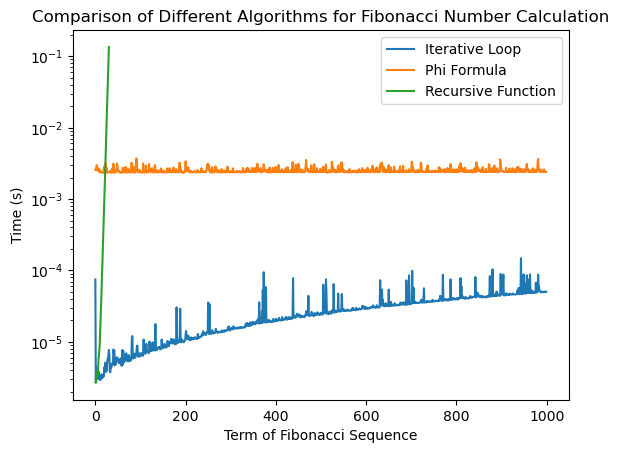

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from timer import Timer

nmax = 1000

number_of_digits = int(0.4*nmax)  # Number of digits in the largest Fibonacci number we want to print

dec.getcontext().prec = number_of_digits

one = dec.Decimal(1)
two = dec.Decimal(2)
five = dec.Decimal(5)
onehalf = dec.Decimal(0.5)

phi = (one + five ** onehalf) / two

nplot = []
nplotr = []
tactual = []
tformula = []
trecursion = []

for nth_term in range(nmax):

    nplot.append(nth_term)

    if nth_term % 10 == 0:
        ending = "th"
    elif nth_term % 10 == 1:
        ending = "st"
    elif nth_term % 10 == 2:
        ending = "nd"
    elif nth_term % 10 == 3:
        ending = "rd"
    else:
        ending = "th"

    time1 = Timer()
    time1.start()
    print(f"The Iterative    {nth_term}{ending} term of the Fibonacci sequence is {fibonacci_iterative(nth_term)}")
    e1 = time1.stop()
    tactual.append(e1)

    print()

    time1.start()
    print(f"The Decimal   {nth_term}{ending} term of the Fibonacci sequence is {fibonacci_phi(nth_term)}")
    e2 = time1.stop()
    tformula.append(e2)

    print()

    if nth_term <= 30:
        nplotr.append(nth_term)
        time1.start()
        print(f"The Recursive {nth_term}{ending} term of the Fibonacci sequence is {fibonacci_recursive(nth_term)}")
        e3 = time1.stop()
        trecursion.append(e3)

plt.plot(nplot, tactual, label='Iterative Loop')
plt.plot(nplot, tformula, label='Phi Formula')
plt.plot(nplotr, trecursion, label='Recursive Function')

plt.title('Comparison of Different Algorithms for Fibonacci Number Calculation')
plt.xlabel('Term of Fibonacci Sequence')
plt.ylabel('Time (s)')
plt.yscale('log')
plt.legend()

plt.show()

# Calculating the Complex Fibonacci Sequence

We begin by importing the matplotlib visualization library.  We also define $\phi$, the so-called golden ratio, as:

$\phi = \frac{1 + \sqrt{5}}{2}$

Finally, we define a function, fibonacci_phi(n), which calculates the $n^{th}$ term of the Fibonacci sequence (f$_n$).  An important point here is the we need to use the "**" exponentiation operator in Python, as opposed to using math.sqrt().

It turns out that there is a formula for calculating the $n^{th}$ term of the Fibonacci sequence, which is:

$$f_n = \frac{\phi^n - (-1/\phi)^n}{\sqrt{5}}$$

If we call this function with a $real$ value of n (as opposed to a natural/whole number value, then it will return a $complex$ value for f$_n$.

Wow, that's kinda interesting!  Let's see what happens when we plot the real and imaginary parts of the Fibonacci sequence as a function of n.  We'll also plot the real and imaginary parts of the sequence for integral values of n, just to see what happens.

In [10]:
import matplotlib.pyplot as plt

phi = (1.0 + 5.0 ** 0.5) / 2.0

def fibonacci_phi(n):
    global phi
    return (phi**n-(-1.0/phi)**n)/5.0**0.5

### Main Program:

1. Define the interval for calculating $f_n$, and the number of data points to use on that interval.  This then defines the interval spacing, dx.

2. Calculate the Fibonacci sequence for the following cases:
    (a) Integral values of n in the given interval, in the case where the interval is on the positive real axis.
    (b) Integral values of n in the given interval, in the case where the interval is on the negative real axis.
    
    Note that for integral values of n, the imaginary part of the sequence will be zero.
    
3.  Calculate the Fibonacci sequence over the given interval.  Store the real and imaginary parts in separate lists, for plotting purposes.

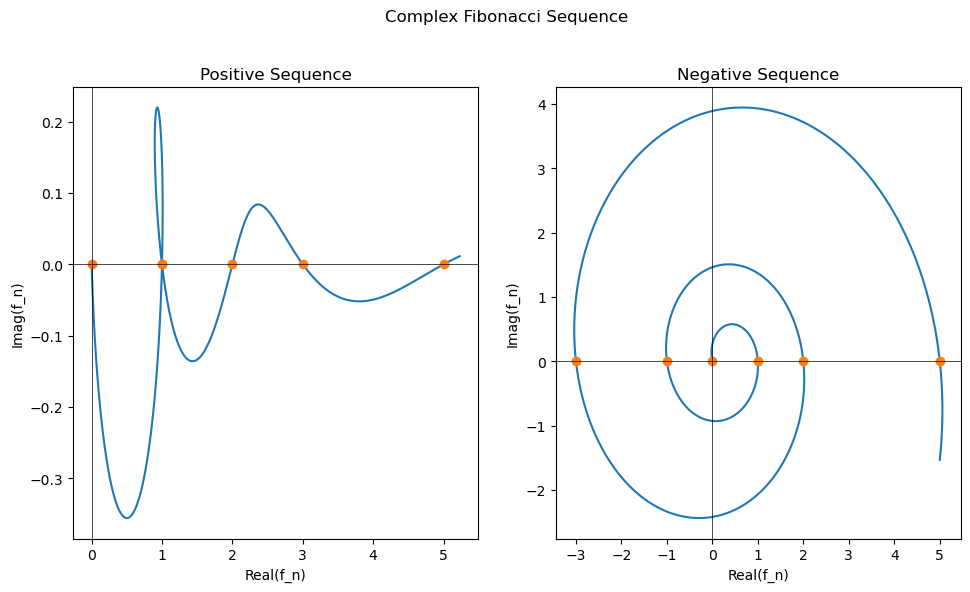

In [11]:
# Define a function to create a LIST of f_n for a range of real values of n
def fibonacci_list(xlow, xhigh):

    npts = 1111
    dx = (xhigh - xlow) / npts

    x_values = []
    y_values = []

    for i in range(npts):
        x = xlow + i * dx
        fn = fibonacci_phi(x)
        # print(x,fn)
        x_values.append(fn.real)
        y_values.append(fn.imag)

    return x_values, y_values


if __name__ == '__main__':

    # set the ranges for "n" ... so, this will calculate the complex Fibonacci
    # sequence for real values of n between [xlow,xhigh] and [-xhigh,-xlow]
    xlow = 0.0
    xhigh = 5.1

    # create lists that contain the positive and negative Fibonacci sequences for
    # INTEGER values of n, since we know what those numbers are, and can then make
    # comparisons, visually.
    fibonnaci_real_pos = [fibonacci_phi(n) for n in range(int(xlow),int(xhigh)+1)]
    fibonnaci_imag_pos = [0 for n in range(int(xlow),int(xhigh)+1)]
    fibonnaci_real_neg = [fibonacci_phi(n) for n in range(-int(xhigh), -int(xlow)+1)]
    fibonnaci_imag_neg = [0 for n in range(-int(xhigh), -int(xlow)+1)]

    npts = 1111
    dx = (xhigh-xlow)/npts

    x_values_pos, y_values_pos = fibonacci_list(xlow, xhigh)
    x_values_neg, y_values_neg = fibonacci_list(xlow, -xhigh)

    # create a figure that has:
    #       (i) an aspect ratio of 10 inches wide x 6 inches high
    #       (ii) two subplots - one row, two columns
    #       (iii) names for the two subplots - ax1 and ax2
    #       (iv) an appropriate title
    #       (v) padding around each subplot, so that don't overlap with one another
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle('Complex Fibonacci Sequence')
    fig.tight_layout(pad=2.5)

    # make the left plot
    ax1.plot(x_values_pos, y_values_pos)
    ax1.plot(fibonnaci_real_pos, fibonnaci_imag_pos, 'o')
    # plot vertical horizontal lines to indicate the y- and x-axis.
    ax1.axvline(x=0, c="black", linewidth=0.5)
    ax1.axhline(y=0, c="black", linewidth=0.5)
    # title and axis labels
    ax1.set_title("Positive Sequence")
    ax1.set_xlabel("Real(f_n)")
    ax1.set_ylabel("Imag(f_n)")

    # make the right plot, similar to the left plot
    ax2.plot(x_values_neg, y_values_neg)
    ax2.plot(fibonnaci_real_neg, fibonnaci_imag_neg, 'o')
    ax2.axvline(x=0, c="black", linewidth=0.5)
    ax2.axhline(y=0, c="black", linewidth=0.5)
    ax2.set_title("Negative Sequence")
    ax2.set_xlabel("Real(f_n)")
    ax2.set_ylabel("Imag(f_n)")

    plt.show()

# The Fibonacci Sequence in Nature

The Fibonacci sequence appears in nature in a number of places.  For example, here is two pictures of a shell that I found on the beach on Hatteras Island, NC:

<div style="display:inline;width:500px">
<img src="./images/Shell2.jpg" width="500" style="display:inline;">
</div>
<div style="display:inline;width:5px;"></div>
<div style="display:inline;width:500px">
<img src="./images/Shell1.jpg" width="500" style="display:inline;">
</div>

  